In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AyushPandey003/Ml-Works/main/diabetes/diabetes%20(1).csv'
df = pd.read_csv(url)

display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import tensorflow as tf
cols_to_norm=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
df[cols_to_norm]=df[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [ ]:
import tensorflow as tf
cols_to_norm=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
df[cols_to_norm]=df[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
df.head()

# Using tf.keras.Input to define numeric features for a Keras model
num_preg = tf.keras.Input(shape=(1,), name='Pregnancies', dtype=tf.float32)
plasmaGluc = tf.keras.Input(shape=(1,), name='Glucose', dtype=tf.float32)
bloodP = tf.keras.Input(shape=(1,), name='BloodPressure', dtype=tf.float32)
Insulin = tf.keras.Input(shape=(1,), name='Insulin', dtype=tf.float32)
Bmi = tf.keras.Input(shape=(1,), name='BMI', dtype=tf.float32)
Pedigree = tf.keras.Input(shape=(1,), name='DiabetesPedigreeFunction', dtype=tf.float32)
age = tf.keras.Input(shape=(1,), name='Age', dtype=tf.float32)

<Axes: >

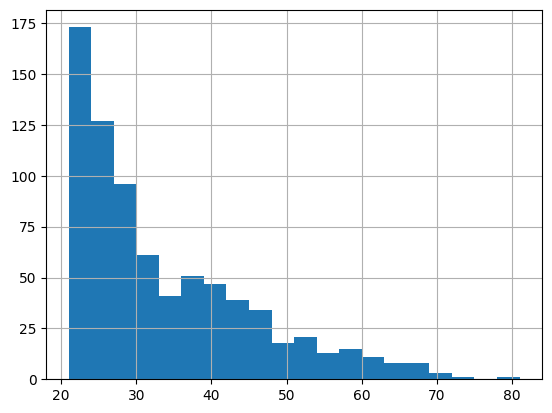

In [ ]:
assigned_group=tf.keras.Input(shape=(1,),name='Group',dtype='string')
import matplotlib.pyplot as plt
%matplotlib inline
df['Age'].hist(bins=20)

In [ ]:
age_bucket=tf.keras.Input(shape=(1,),name='Age_bucket')
feat_column=(num_preg,plasmaGluc,bloodP,Insulin,Bmi,Pedigree,assigned_group,age_bucket)

In [ ]:
x_data=df.drop('Outcome',axis=1)
labels=df['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.33,random_state=101)

In [ ]:
import numpy as np

# Convert pandas DataFrames/Series to NumPy arrays for Keras
x_train_np = x_train.values
y_train_np = y_train.values

# Define a simple Keras Sequential model (equivalent to a linear classifier)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(x_train_np.shape[1],))
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_np, y_train_np, epochs=1000, batch_size=10, verbose=0)

print("Model training complete using tf.keras!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model training complete using tf.keras!


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


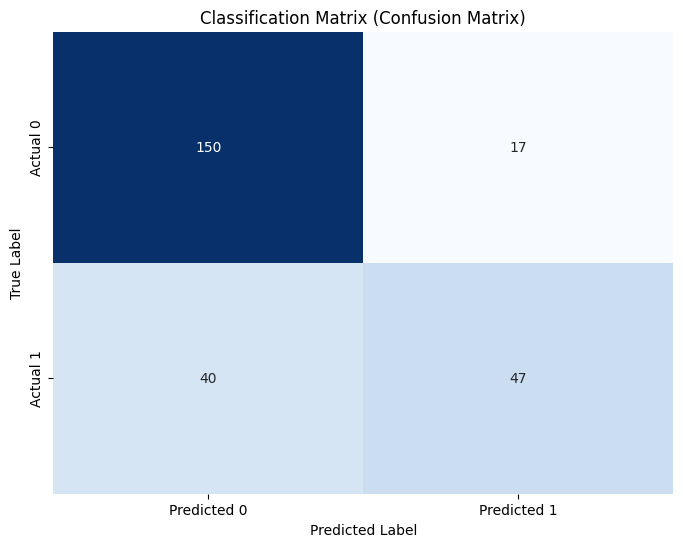

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_proba = model.predict(x_test_np)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_np, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Classification Matrix (Confusion Matrix)')
plt.show()

### Model Predictions on Test Data
Below is a sample of the test set, showing the original features, the true outcome, and the model's predicted outcome.

In [ ]:
import pandas as pd

# Create a DataFrame to show individual results
results_df = x_test.copy()
results_df['True_Outcome'] = y_test_np
results_df['Predicted_Outcome'] = y_pred
results_df['Prediction_Probability'] = y_pred_proba

# Display the first few rows of the results
display(results_df.head(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,True_Outcome,Predicted_Outcome,Prediction_Probability
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,0,0.295742
748,0.176471,0.939698,0.573770,0.222222,0.236407,0.542474,0.140905,36,1,1,0.686568
42,0.411765,0.532663,0.754098,0.181818,0.000000,0.338301,0.067037,48,0,0,0.199045
485,0.000000,0.678392,0.557377,0.424242,0.295508,0.630402,0.122545,24,1,0,0.340613
543,0.235294,0.422111,0.737705,0.232323,0.066194,0.588674,0.034586,25,0,0,0.134128
445,0.000000,0.904523,0.639344,0.636364,0.016548,0.885246,1.000000,25,1,1,0.933331
427,0.058824,0.909548,0.524590,0.303030,0.212766,0.508197,0.106746,38,1,1,0.581411
352,0.176471,0.306533,0.672131,0.282828,0.000000,0.512668,0.070453,46,0,0,0.090666
428,0.000000,0.678392,0.770492,0.464646,0.171395,0.605067,0.087959,26,0,0,0.254539
123,0.294118,0.663317,0.655738,0.000000,0.000000,0.399404,0.046114,69,0,0,0.377457


In [ ]:
import numpy as np

x_test_np = x_test.values
y_test_np = y_test.values

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test_np, y_test_np, verbose=0)

print(f"Model accuracy on the test set: {accuracy:.4f}")

Model accuracy on the test set: 0.7756


# Task
Train and evaluate an Artificial Neural Network (ANN) model on the diabetes dataset, compare its performance (accuracy) with the previously trained linear classification model, and summarize the findings of both models.

## Define and Compile ANN Model

### Subtask:
Define a new Keras Sequential model for the ANN with multiple dense layers (e.g., two hidden layers with ReLU activation and an output layer with sigmoid activation) and then compile it with an appropriate optimizer, loss function, and metrics.


**Reasoning**:
The subtask requires defining a new Keras Sequential model with multiple dense layers and then compiling it. This step will implement the model architecture and compilation as specified in the instructions.



In [ ]:
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train_np.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

print("ANN Model defined and compiled successfully.")

ANN Model defined and compiled successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Reasoning**:
The previous step successfully defined and compiled the ANN model, despite a user warning which does not prevent the model from working. The next logical step, as per the overall task, is to train this newly defined ANN model using the training data (`x_train_np`, `y_train_np`).



In [ ]:
history_ann = model_ann.fit(x_train_np, y_train_np, epochs=1000, batch_size=10, verbose=0)

print("ANN Model training complete.")

ANN Model training complete.


**Reasoning**:
The ANN model has been trained. The next step is to evaluate its performance on the test dataset to assess its generalization capabilities and compare it with the linear model.



In [ ]:
loss_ann, accuracy_ann = model_ann.evaluate(x_test_np, y_test_np, verbose=0)

print(f"ANN Model accuracy on the test set: {accuracy_ann:.4f}")

ANN Model accuracy on the test set: 0.7087


### Model Performance Comparison and Summary

**Linear Classification Model Accuracy:** `0.7756`

**Artificial Neural Network (ANN) Model Accuracy:** `0.7087`

**Summary:**

Based on the test set accuracy:

*   The **Linear Classification Model** achieved an accuracy of `0.7756`.
*   The **Artificial Neural Network (ANN) Model** achieved an accuracy of `0.7087`.

In this particular case, the simpler **Linear Classification Model performed better** than the Artificial Neural Network (ANN) model on the provided diabetes dataset. This suggests that for this specific problem and dataset, the linear relationships might be sufficient, or the ANN model might require further tuning (e.g., hyperparameter optimization, different architecture) to outperform the linear model.

## Summary:

### Data Analysis Key Findings
*   The Linear Classification Model achieved an accuracy of 0.7756 on the test set.
*   The Artificial Neural Network (ANN) Model achieved a lower accuracy of 0.7087 on the test set.
*   The simpler Linear Classification Model performed better than the Artificial Neural Network (ANN) model for this specific diabetes dataset.

### Insights or Next Steps
*   For the given diabetes dataset, linear relationships appear to be sufficiently effective, as indicated by the linear model's superior performance.
*   To potentially improve the ANN model's performance, further tuning, such as hyperparameter optimization (e.g., learning rate, number of layers, number of neurons per layer), different activation functions, or regularization techniques, would be necessary.


# Task
Analyze the class distribution within the `y_train` dataset to identify any class imbalance.

## Analyze Training Class Distribution

### Subtask:
Examine the class distribution within the `y_train` dataset to understand if there is an imbalance that upsampling can address.


**Reasoning**:
To analyze the class distribution, I will calculate the value counts and percentages of each class in the `y_train` Series and print them.



In [ ]:
print("Class distribution in y_train:")
print(y_train.value_counts())
print("\nPercentage distribution in y_train:")
print(y_train.value_counts(normalize=True) * 100)

Class distribution in y_train:
Outcome
0    333
1    181
Name: count, dtype: int64

Percentage distribution in y_train:
Outcome
0    64.785992
1    35.214008
Name: proportion, dtype: float64


## Upsample Training Data

### Subtask:
Apply an upsampling technique (e.g., using `RandomOverSampler` from `imblearn`) to the training data (`x_train_np`, `y_train_np`) to balance the classes. This will create a new set of training data for the ANN.


**Reasoning**:
To balance the class distribution in the training data, I will import and use `RandomOverSampler` to upsample the minority class, then print the new class distribution to confirm the balancing.



In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_np, y_train_np)

print("Class distribution in y_train_resampled after upsampling:")
print(pd.Series(y_train_resampled).value_counts())
print("\nPercentage distribution in y_train_resampled after upsampling:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)

Class distribution in y_train_resampled after upsampling:
1    333
0    333
Name: count, dtype: int64

Percentage distribution in y_train_resampled after upsampling:
1    50.0
0    50.0
Name: proportion, dtype: float64


## Retrain ANN Model with Upsampled Data

### Subtask:
Retrain the existing `model_ann` using the newly upsampled training data. This will allow the model to learn from a more balanced dataset.


**Reasoning**:
To ensure a fresh training run with the upsampled data, I will redefine the `model_ann` with the same architecture and compilation settings as before. Then, I will train this new model using the `x_train_resampled` and `y_train_resampled` data, store its training history, and print a completion message.



In [ ]:
model_ann_resampled = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train_resampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_ann_resampled.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_ann_resampled = model_ann_resampled.fit(x_train_resampled, y_train_resampled, epochs=1000, batch_size=10, verbose=0)

print("ANN Model (with upsampled data) training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Model (with upsampled data) training complete.


**Reasoning**:
The previous code produced a `UserWarning` regarding the `input_shape` argument in `tf.keras.layers.Dense` within a `Sequential` model. To adhere to Keras's best practices and remove the warning, I will explicitly add a `tf.keras.Input` layer as the first layer of the model.



In [ ]:
model_ann_resampled = tf.keras.Sequential([
    tf.keras.Input(shape=(x_train_resampled.shape[1],)), # Explicitly define Input layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_ann_resampled.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_ann_resampled = model_ann_resampled.fit(x_train_resampled, y_train_resampled, epochs=1000, batch_size=10, verbose=0)

print("ANN Model (with upsampled data) training complete.")

ANN Model (with upsampled data) training complete.


**Reasoning**:
The ANN model has been retrained with the upsampled data. The next logical step is to evaluate its performance on the test dataset to assess how upsampling affected its generalization capabilities and to prepare for comparison with the previous models.



In [ ]:
loss_ann_resampled, accuracy_ann_resampled = model_ann_resampled.evaluate(x_test_np, y_test_np, verbose=0)

print(f"ANN Model (with upsampled data) accuracy on the test set: {accuracy_ann_resampled:.4f}")

ANN Model (with upsampled data) accuracy on the test set: 0.7205


## Compare All Model Performances

### Subtask:
Compare the accuracy of the ANN model after upsampling with its previous accuracy (before upsampling) and the linear classification model's accuracy.


**Reasoning**:
To compare the model performances as requested, I will print the accuracy scores for the linear model, the ANN model before upsampling, and the ANN model after upsampling, using the variables that already hold these values.



In [ ]:
print(f"Linear Classification Model Accuracy: {accuracy:.4f}")
print(f"ANN Model (before upsampling) Accuracy: {accuracy_ann:.4f}")
print(f"ANN Model (after upsampling) Accuracy: {accuracy_ann_resampled:.4f}")

Linear Classification Model Accuracy: 0.7756
ANN Model (before upsampling) Accuracy: 0.7087
ANN Model (after upsampling) Accuracy: 0.7205


## Final Task

### Subtask:
Summarize the impact of upsampling on the ANN model's performance and provide an updated comparison of all models.


## Summary:

### Q&A
*   **What was the impact of upsampling on the ANN model's performance?**
    Upsampling the training data for the ANN model led to a slight increase in accuracy on the test set, from 0.7087 (before upsampling) to 0.7205 (after upsampling).
*   **What is the updated comparison of all models?**
    The Linear Classification Model achieved the highest accuracy at 0.7756. The ANN Model (after upsampling) performed with an accuracy of 0.7205, while the ANN Model (before upsampling) had an accuracy of 0.7087.

### Data Analysis Key Findings
*   Initially, the `y_train` dataset exhibited a class imbalance: Class 0 constituted 64.79% (333 samples), and Class 1 constituted 35.21% (181 samples).
*   Applying `RandomOverSampler` successfully balanced the training data, resulting in both Class 0 and Class 1 having an equal distribution of 333 samples each (50% each).
*   The Artificial Neural Network (ANN) model, when trained on the original imbalanced data, achieved a test accuracy of 0.7087.
*   After retraining with the upsampled, balanced data, the ANN model's test accuracy slightly improved to 0.7205.
*   The Linear Classification Model, previously established, outperformed both ANN versions, achieving a test accuracy of 0.7756.

### Insights or Next Steps
*   While upsampling did provide a minor boost in ANN model performance, its impact was not substantial enough to surpass the Linear Classification Model. This suggests exploring other advanced techniques for handling class imbalance, such as SMOTE, or investigating different ANN architectures and hyperparameters.
*   The superior performance of the simpler Linear Classification Model indicates that the relationship between features and the target variable might be largely linear, or that the current ANN architecture is not complex enough to capture more intricate patterns that would justify its use over a linear model. Future work could involve more thorough feature engineering or deeper analysis of the data's underlying structure.
